In [110]:
import numpy as np
import matplotlib.pyplot as plt
import time
import random

## Задача 1

Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 с весами 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса. Сравните время генерации выборки с неупорядоченными и упорядоченными весами.

неупорядоченные веса:

Время: 0.00202178955078125


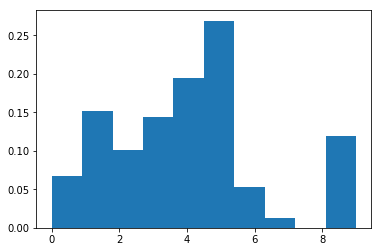

In [80]:
weight=np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
weight=weight/weight.sum()
weight=weight.cumsum()
data=[]
start=time.time()
random = np.random.rand(1000)
for i in range(1000):
    for j in range(10):
        if random[i]<weight[j]:
            data.append(j)
            break
finish=time.time()
print('Время:',finish-start)

plt.hist(data, density = True)
plt.show()

упорядоченные веса:

Время: 0.0019953250885009766


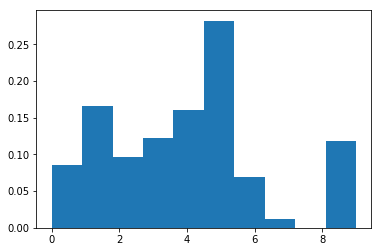

In [87]:
weight=np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
a=np.argsort(weight)
weight=np.sort (weight)
weight=weight/weight.sum()
weight=weight.cumsum()
data=[]
start=time.time()
random = np.random.rand(1000)
for i in range(1000):
    for j in range(10):
        if random[i]<weight[j]:
            data.append(a[j])
            break
finish=time.time()
print('Время:',finish-start)

plt.hist(data, density = True)
plt.show()



# Задача 2

Смоделируйте выборку размера 1000 из распределения  Exp(λ) . Постройте выборочную гистограмму и точный график плотности распределения.

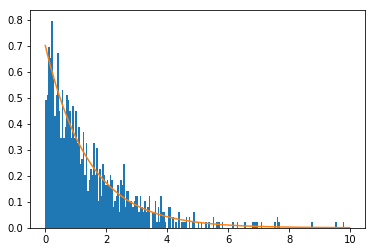

In [101]:
l = 0.7
rand = -np.log(1-np.random.random(1000))/l
data = np.arange(1000)/100
plt.hist(rand,bins=200, density=True)
plt.plot(data,l*np.exp(-l*data))
plt.show()


# Задача 3

Обоснуйте, что метод accept-reject действительно производит выборку из нужного распределения. Смоделируйте 1000 точек из усеченного распределения Коши, приведенного ниже, используя генератор равномерного распределения. Нарисуйте график полученной выборочной гистограммы и сравните его с графиком точной функции плотности.



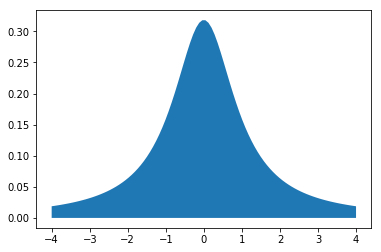

In [102]:
from scipy import stats
import numpy as np
dist = stats.cauchy()
x = np.linspace(-4, 4, 100)
plt.fill_between(x, 0, dist.pdf(x)) #needs to be normalized!
plt.show()


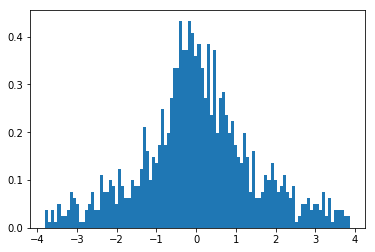

In [142]:
import math
x = []
for i in range (10000):
    d=random.uniform(-4,4) 
    if(random.random() < 1/(math.pi*(1 + d*d))): 
        x.append(d)
plt.hist(x,bins=100, density = True)
plt.show()

# Задача 4

Смоделировать выборку из 500 точек равномерно распределенных внутри данного треугольника без использования метода отбора.

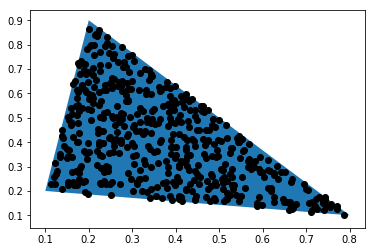

In [188]:
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

polygon = Polygon(0.1 * np.array([[1, 2], [2, 9], [8, 1]]), True)
plt.gca().add_collection(PatchCollection([polygon]))

rand = np.random.rand(500)
ab_p = np.array([(1 - math.sqrt(1 - rand[i])) for i in range(500)]) 
or_p = np.random.rand(500) * (1 - ab_p) 
x = 0.1 + 0.7 * ab_p + 0.1 * or_p 
y = 0.2 - 0.1 * ab_p + 0.7 * or_p 
plt.scatter(x, y, c='black')

plt.show()

# Задача 5

Смоделировать выборку из 500 точек внутри данного круга без использования метода отбора.

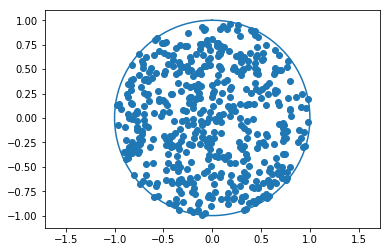

In [189]:
from matplotlib.patches import Circle
t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')

r=np.sqrt(np.random.rand (500))
phi=np.random.rand (500)*2*math.pi
plt.scatter(r*np.cos(phi), r*np.sin(phi))

plt.show()

# Задача 6

Напишите функцию, которая моделирует случайное симметричное блуждание на двумерной решетке длины n c началом и концом в точке (0, 0). Приведите графики выборочных траекторий для n=100.

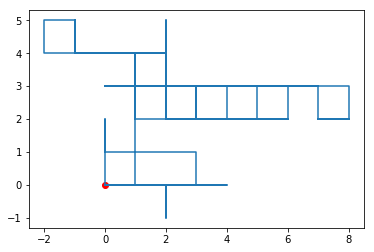

In [235]:
n=100

rand = np.random.rand(100)*5

walk = np.zeros((n, 2))

for i in range(1,n):
    if rand[i] > 3:
        walk[i, :] = walk[i-1,:] + np.array([1, 0])
    if rand[i] > 2 and rand[i] <= 3:
        walk[i, :] = walk[i-1,:] + np.array([0, 1])
    if rand[i] > 1 and rand[i] <= 2:
        walk[i, :] = walk[i-1,:] + np.array([-1, 0])
    if rand[i] <= 1:
        walk[i, :] = walk[i-1,:] + np.array([0, -1])


plt.plot(walk[:,0],  walk[:,1])
plt.scatter(0,0, color = 'red')
plt.show()

# Задача 7

Докажите, что приведенный ниже алгоритм (Box-Muller algorithm) формирует выборку из независимых N(0,1) случаных величин. Модифицируйте метод, чтобы исключить вызовы тригонометрических функций np.sin и np.cos. С помощью модифицированного метода смоделируйте выборку объема 1000 из двумерного гауссовского распределения со средним (3, 6) и ковариационной матрицей ((2, 1), (1, 4)). Постройте 2D гистограмму полученного распределения.

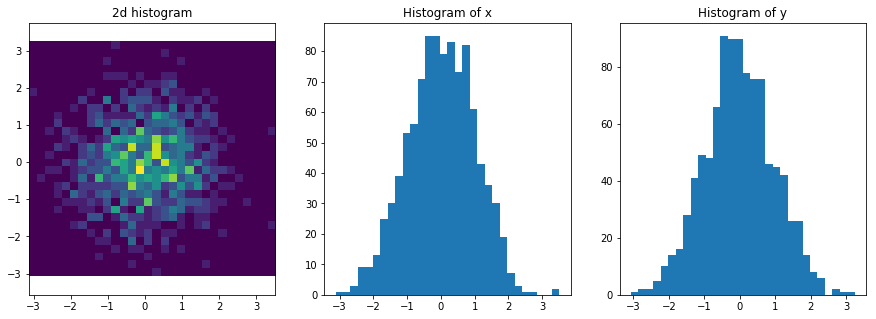

In [236]:
n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()